# 📖 Introduccion

**Introducción** <br>
En el siguiente trabajo, se contempla el estudio y análisis de los puestos de trabajo de Data Science, su salario y su relación entre variables.
¿Existe relación entre el salario y su ubicación geográfica? ¿Existe relación entre el salario y su proporción de trabajo remoto? <br>
En este trabajo, se intentará responder las relaciones de este ámbito laboral, y sus respectivas variables.<br>

**Audiencia**<br>
Este estudio está dirigido a empresas que busquen contratar a los mejores candidatos y para los empleados que buscan negociar mejores salarios en función de su perfil. De todas formas, este trabajo abarca una amplia audiencia sobre sí mismo. Ya que las utilidades podrían ser tales como estudiantes que buscan qué área estudiar, comprender la tendencia salarial del campo. Pero también podría ser útil para posiciones, o estudios de mercado.<br> <br>

**Temática** <br>
La temática que se investiga es la relación de los salarios en relación con su ubicación, a su nivel de experiencia, a su ubicación geográfica o tipo de empresa en la cual trabaja o su tipo de empleabilidad. ***A través de este análisis buscamos segmentar las diferentes variables para responder las preguntas dadas por la empresa.***<br> <br>





### **Hipotesis y Objetivo**


**Contexto Comercial:** Participamos en una empresa la cual nos brinda un dataset de su área de Data Science. Quieren desarrollar los datos, y obtener insights para ver su desarrollo en cuanto salario.





**Problema Comercial**: Nuestro trabajo será desarrollar los datos proporcionados por la empresa y proporcionar visualizaciones específicas correspondiente a las preguntas del cliente. 



**Contexto Analítico**: Se nos proporciona un dataset en formato CSV que contiene detalles en su forma de pago. Año de trabajo, nivel de experiencia, tipo de contrato, título del trabajo, salario, salario en dólares, tipo de residencia, si es remoto o no, localización de la compañía y tamaño de la compañía.



Teniendo esto en cuenta, el cliente nos brinda las siguientes preguntas. El objetivo claro es poder brindar una buena exploración de los datos, y darle información precisa al empleador


**Preguntas**
```
a) El nivel de salario aumenta con base en la cantidad de experiencia que posea el empleado?
b) Los salarios aumentaron o decrecieron con el paso de los años?
c) Pagamos mejor a los trabajadores en remoto, o los presenciales?
d) Que área específica pagamos más?
e) Hay más trabajadores en remoto, o presenciales?
f) Las compañías grandes pagan más?
g) Aumenta según el tipo de contratación?
h) Donde reside el empleado, tiene variabilidad en los salarios?
```


# ✈️ Importar Librerias y Abrir el dataset

In [2]:
%pip install mlxtend
%pip install plotly_express==0.4.0
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import scipy
import plotly.express as px



In [4]:
%cd C:\Users\leand\Desktop\Data Science\Excel
df_salary = pd.read_csv("datascience_salaries.csv",sep=',')
heatmap = pd.read_csv("datascience_salaries.csv",sep=',')
heatmap2 = pd.read_csv("datascience_salaries.csv",sep=',')

C:\Users\leand\Desktop\Data Science\Excel


# 🤖 Comienzo el desarrollo, comprobacion de valores nulos y duplicados

In [5]:
df_salary.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Comienzo el desarrollo de los datos, comenzamos con un encabezado que nos traera los datos en el DF.

In [6]:
df_salary.columns
df_salary.info

<bound method DataFrame.info of      Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD        

Las columnas son las provistas por la empresa. <br>
***Unnamed**: Numeracion de columna.<br>
**Work_Year**: Año de trabajo.<br>
**Experience_Level**: Nivel de experiencia.<br>
**Employment_Type**: Tipo de contratacion.<br>
**Job_Title**: Titulo del trabajo.<br>
**Salary**: Salario.<br>
**Salary_Currency**: Tipo de moneda utilizada en el salario.<br>
**Salary_In_USD**: Salario en dolares.<br>
**Emplyee_Recience**: Recidencia del empleado.<br>
**Remote_Ratio**: Si trabaja en remoto, hibrido o precencial.<br>
**Company_Location**: Localizacion o region de la empresa.<br>
**Company_Size**: Tamaño de la empresa.<br>

In [7]:
df_salary.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [8]:
df_salary.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [113]:
df_salary.agg(["min","mean","max"]).T

C:\Users\leand\AppData\Local\Temp\ipykernel_13700\2640788320.py:1: FutureWarning:

['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,min,mean,max
work_year,2020.0,2021.405272,2022.0
experience_level,Entry-level/Junior,NaN,Senior-level/Expert
employment_type,Contract,NaN,Part-time
job_title,3D Computer Vision Researcher,NaN,Staff Data Scientist
salary,4000.0,324000.062603,30400000.0
salary_currency,AUD,NaN,USD
salary_in_usd,2859.0,112297.869852,600000.0
employee_residence,AE,NaN,VN
remote_ratio,0.0,70.92257,100.0
company_location,AE,NaN,VN


# 🔎Data Wranling

### Exploracion sencilla y comprobacion de Nan y duplicados

En esta seccion nos cercioramos de que el dataset, este limpio y libre de problemas para el area de Machine Learning

### Valores nulos

In [10]:
df_salary.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

En este caso, nuestro dataset no tiene valores nulos.

In [11]:
df_salary.isna().any()

Unnamed: 0            False
work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

Nos cercioramos de que el dataset no tenga datos NaN
Y en conclusion determinamos que el dataset no tiene ni valores nulos, ni duplicados.

### Mejoras

In [12]:
df_salary['experience_level'] = df_salary['experience_level'].replace('EN','Entry-level/Junior') 
df_salary['experience_level'] = df_salary['experience_level'].replace('MI','Mid-level/Intermediate')
df_salary['experience_level'] = df_salary['experience_level'].replace('SE','Senior-level/Expert')
df_salary['experience_level'] = df_salary['experience_level'].replace('EX','Executive-level/Director')

In [13]:
df_salary['employment_type'] = df_salary['employment_type'].replace('PT','Part-time')
df_salary['employment_type'] = df_salary['employment_type'].replace('FT','Full-time')
df_salary['employment_type'] = df_salary['employment_type'].replace('CT','Contract')
df_salary['employment_type'] = df_salary['employment_type'].replace('FL','Freelance')

In [14]:
del df_salary['Unnamed: 0']

### Copia de Salary

In [15]:
df_salaryML_LabelEncoder = df_salary.copy()
df_salaryML_OH = df_salary.copy()

***Crearemos este DF para trabajar con MachineLearning, y lo dejaremos listo para su area. Esto consistira en eliminar outliers, tratar con datos perdidos o lo que sea necesario.***

### En la copia, pasaremos las variables cateogricas a numericas

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_salaryML_LabelEncoder['employment_type'] = encoder.fit_transform(df_salaryML_LabelEncoder['employment_type'])
df_salaryML_LabelEncoder['experience_level'] = encoder.fit_transform(df_salaryML_LabelEncoder['experience_level'])
df_salaryML_LabelEncoder['employee_residence'] = encoder.fit_transform(df_salaryML_LabelEncoder['employee_residence'])
df_salaryML_LabelEncoder['company_location'] = encoder.fit_transform(df_salaryML_LabelEncoder['company_location'])
df_salaryML_LabelEncoder['company_size'] = encoder.fit_transform(df_salaryML_LabelEncoder['company_size'])
df_salaryML_LabelEncoder['job_title'] = encoder.fit_transform(df_salaryML_LabelEncoder['job_title'])
df_salaryML_LabelEncoder['salary_currency'] = encoder.fit_transform(df_salaryML_LabelEncoder['salary_currency'])




In [17]:
df_salaryML_LabelEncoder.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,22,70000,7,79833,14,0,12,0
1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2020,3,2,7,85000,8,109024,20,50,18,1
3,2020,2,2,47,20000,16,20000,23,0,20,2
4,2020,3,2,38,150000,16,150000,55,50,48,0


### OneHot Encoder

In [18]:
from sklearn.preprocessing import OneHotEncoder #Pendiente

# 📊Comienzo a responder las preguntas del cliente (EDA)🔭

**Cabe aclarar que la exploracion de datos y contestacion de preguntas, estaremos trabajando con un DF distinto. El utilizado aqui se utilizara sin el DataWranling para que los datos sean en bruto, y al momento de entrar en machinelearning utilizaremos el dataset limpio y preparado para el**

In [19]:
df_salary.corr()

C:\Users\leand\AppData\Local\Temp\ipykernel_13700\627742464.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_salary.corr()


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


In [20]:
df_salaryML_LabelEncoder.corr()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.300632,0.016323,-0.162560,-0.087577,0.202420,0.170493,0.193552,0.076314,0.181515,0.078764
experience_level,0.300632,1.000000,-0.043715,0.020192,-0.023811,0.199998,0.315312,0.226543,0.053628,0.247133,-0.066423
employment_type,0.016323,-0.043715,1.000000,-0.101823,0.000536,-0.087365,-0.123545,-0.109979,-0.045592,-0.083661,0.034549
job_title,-0.162560,0.020192,-0.101823,1.000000,0.027710,-0.149591,0.131016,-0.119135,-0.058589,-0.147379,-0.031011
salary,-0.087577,-0.023811,0.000536,0.027710,1.000000,-0.120725,-0.083906,-0.105638,-0.014608,-0.082894,-0.079959
salary_currency,0.202420,0.199998,-0.087365,-0.149591,-0.120725,1.000000,0.420550,0.758730,0.149746,0.787084,0.038849
salary_in_usd,0.170493,0.315312,-0.123545,0.131016,-0.083906,0.420550,1.000000,0.452501,0.132122,0.428994,-0.151205
employee_residence,0.193552,0.226543,-0.109979,-0.119135,-0.105638,0.758730,0.452501,1.000000,0.157299,0.897704,-0.081742
remote_ratio,0.076314,0.053628,-0.045592,-0.058589,-0.014608,0.149746,0.132122,0.157299,1.000000,0.169083,0.022070
company_location,0.181515,0.247133,-0.083661,-0.147379,-0.082894,0.787084,0.428994,0.897704,0.169083,1.000000,-0.066554


## Analisis Univariado

### Experience Level

In [21]:
experience_level = df_salary['experience_level'].value_counts()
px.bar(y=experience_level.values, x=experience_level.index, color_discrete_sequence=px.colors.sequential.deep)

Podemos ver que dentro de esta columna, senior predomina los datos. Por siguiente tenemos Midlevel, junior y finalmente Executive level. Aun que no sorprenda, la mayoría de nuestros científicos de datos son nivel Senior o semi senior, y lo mas raro de encontrar seria aquellos en posición de ejecutivos.

### Job_Title

In [22]:
print('Hay actualmente:', df_salary['job_title'].value_counts().size, 'trabajos en la columna Job_title')

Hay actualmente: 50 trabajos en la columna Job_title


In [23]:
top10_trabajos = df_salary['job_title'].value_counts()[:10]
px.bar(y=top10_trabajos.values, x=top10_trabajos.index, color = top10_trabajos.index, color_discrete_sequence=px.colors.sequential.deep)

Podemos darnos cuenta de que Data scientist, Data Engineer y Data Analyst predominan la columna. Esto no nos da tanta información, pero si nos brinda cierto conocimiento sobre las posiciones mas populares.

### Employment Type

In [24]:
Employment_group = df_salary['employment_type'].value_counts()
emplyment_types=['Full-time', 'Part-time', 'Contract', 'Freelance']
px.bar(x=emplyment_types, y = Employment_group.values, color= Employment_group.index, color_discrete_sequence=px.colors.sequential.deep)

Podemos ver que en su gran mayoría, el tipo de contratación Full Time es el que mayor datos posee. Esto puede representar un sesgo de datos al momento de realizar el modelo de ML, asi que hay que tener cuidado.

### Employee location

In [25]:
residence = df_salary['employee_residence'].value_counts()
top10_employee_location = residence[:10]
px.bar(y=top10_employee_location.values, x=top10_employee_location.index, color = top10_employee_location.index, color_discrete_sequence=px.colors.sequential.deep)

Acá podemos apreciar que la mayoría de nuestros datos de los residentes se encuentran en EEUU, me preocupa el sesgo de los datos, al ser más de 300 la residencia de nuestros empleados. Aunque tratándose de este caso, de una empresa que su sede mayor está en EEUU, no sorprende, aunque veo que puede ser un problema al realizar modelos de aprendizaje automático.


### Company Size

In [26]:
workyear = df_salary['work_year'].value_counts()
px.pie(values=workyear.values, names=workyear.index ,color_discrete_sequence=px.colors.sequential.deep )

En nuestros datos predomina el año 2022 siguiendo 2021... Me preocupa la poca información de los datos del 2020 y que represente un sesgo de los datos.

### Salary in usd

In [70]:
fig1 = px.box(y=df_salary['salary_in_usd'])
fig2 = px.histogram(df_salary, x="salary_in_usd", nbins=10, color_discrete_sequence=px.colors.sequential.deep)
fig1.show()
fig2.show()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

Gracias a estos graficos, podemos determinar los promedio de los salarios, y en donde se encuentra los salarios en promedio, siendo el mayor exponente entre 0-100k de dolares, ademas podemos determinar que la media es de 101k

### Remote ratio

In [28]:
remote_type=['Totalmente Remoto', 'Parcialmente Remoto', 'No trabaja remoto']
px.bar(x=['Totalmente Remoto', 'Parcialmente Remoto', 'No trabaja remoto'], y=df_salary['remote_ratio'].value_counts().values, color=remote_type, color_discrete_sequence=px.colors.sequential.deep )

En este caso vemos que hay muchísimos mas casos de gente trabajando totalmente remoto, que parcial o presencial. Eso quizás se deba, a que las posiciones de Data scientist, no son tan requerido la parte presencial, si no que se trata de posiciones mas de conocimiento de negocio, y escritura de código. Ademas de buenas practicas.

## Analisis Bivariado y respuestas a las preguntas

### El nivel de salario aumenta en base a la cantidad de experiencia?


In [89]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
boxplotmedian = df_salary.groupby('experience_level')['salary_in_usd'].median().sort_values()
px.box(df_salary, x='experience_level', y='salary_in_usd', category_orders={"experience_level": boxplotmedian.index})

<Figure size 1000x600 with 0 Axes>

Comienzo utilizando un boxplot para graficar el nivel de salario, contra su nivel de experiencia. La respuesta es obvia, pero a medida que aumenta la experiencia, suben los salarios. 
En este boxplot podemos apreciar que el nivel mas bajo es el entry, siguiendo por el mid junior, y posterior mente senior y expert.

Text(0, 0.5, 'Salario en Dolares')

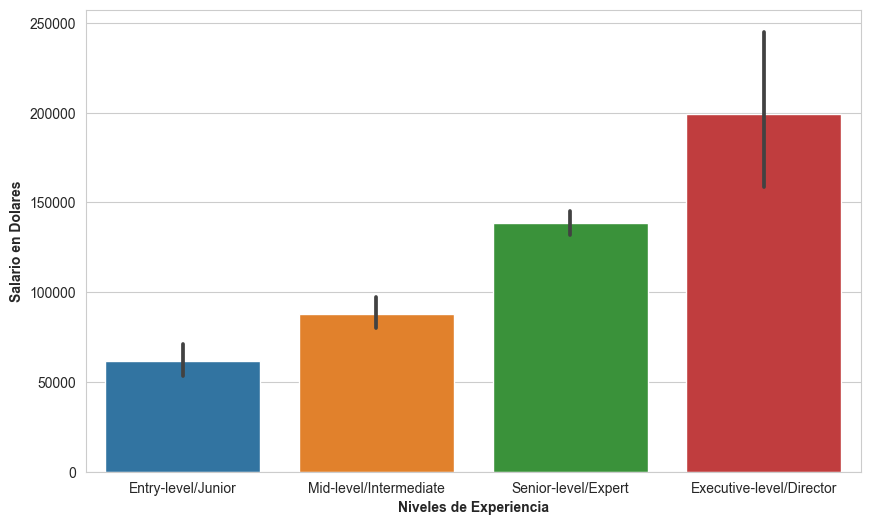

In [94]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_salary, x='experience_level', y='salary_in_usd', order=boxplotmedian.index)
plt.xlabel('Niveles de Experiencia', fontweight='bold' )
plt.ylabel('Salario en Dolares', fontweight='bold') 

De todas formas, haremos un barplot para una mejor visualización, para que sea mas sencillo de interpretar por el cliente. De estos gráficos, concluimos con la información básica y algo redundante, de que a mayor nivel de conocimiento mayor serán los salarios. Aun que por supuesto, dependiendo de la empresa, hay obvias excepciones. Como lo podemos ver en los outliers.

In [95]:
px.bar(df_salary, x='experience_level', y='salary_in_usd', category_orders={"experience_level": boxplotmedian.index})


Me gustaría pedir ayuda sobre este gráfico, por que no entiendo por que se ve asi.

### Salarios en medida de los años

In [100]:
boxplotyear = df_salary.groupby('work_year')['salary_in_usd'].median().sort_values()
fig = px.box(df_salary, y='salary_in_usd', x='work_year', color='experience_level', \
             category_orders={"work_year": boxplotyear.index, "experience_level": ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director']}, \
             labels={'work_year':'Año de Trabajo', 'salary_in_usd':'Salario en Dolares'})
fig.update_layout(xaxis=dict(showgrid=False, zeroline=False), yaxis=dict(showgrid=True, zeroline=False))
fig.show()


Text(0, 0.5, 'Salario en Dolares')

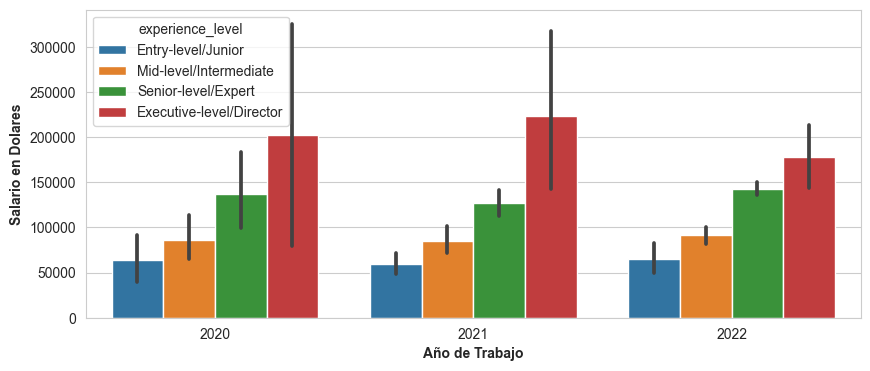

In [33]:
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")
sns.barplot(data=df_salary, y='salary_in_usd', x='work_year',hue='experience_level', order=boxplotyear.index, hue_order=['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director'])
plt.xlabel('Año de Trabajo', fontweight='bold' )
plt.ylabel('Salario en Dolares', fontweight='bold') 


Curiosamente, a pesar de que la media en los años proximos se ve un aumento salarial, en el 2020 habia suficientes outliners que se acercaron a la media del 2022, sin importar eso, es notable el aumento salarias al partir de la media del 2022. Me gustaria ver los graficos por mes, o por cuatrimestre, pero lamentablemente el dataset provisto no contiene tal informacion. <br>
**Actualizacion** = Probablemente, debido a la falta de habilidad, cometi un sesgo de informacion. La conclucion de arriba era incorrecta, por que los salarios si bien estan aumentando con el paso de los años, solo se ve notable en algunos niveles correspondientes. Ya que hay niveles en los que años posteriores se cobraba mas.

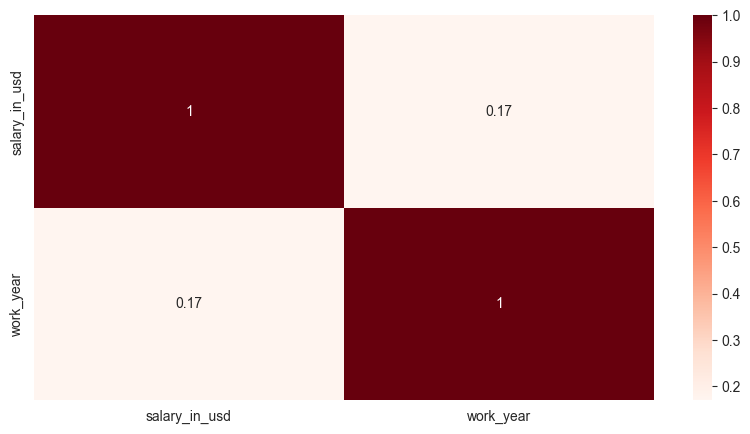

In [34]:
coryear=df_salary.loc[:,['salary_in_usd','work_year']].corr()
plt.figure(figsize=(10,5))
heatmap=sns.heatmap(coryear, annot=True, cmap=plt.cm.Reds)
plt.show()

### Salarios remotos, hibridos y precenciales.

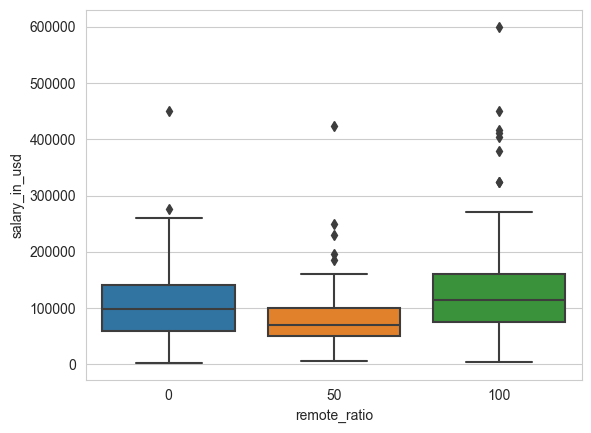

In [104]:
sns.set_style("whitegrid")
sns.boxplot(data=df_salary, x='remote_ratio', y='salary_in_usd')
plt.subplots_adjust(wspace=0.5)
plt.show()

<AxesSubplot: xlabel='remote_ratio', ylabel='salary_in_usd'>

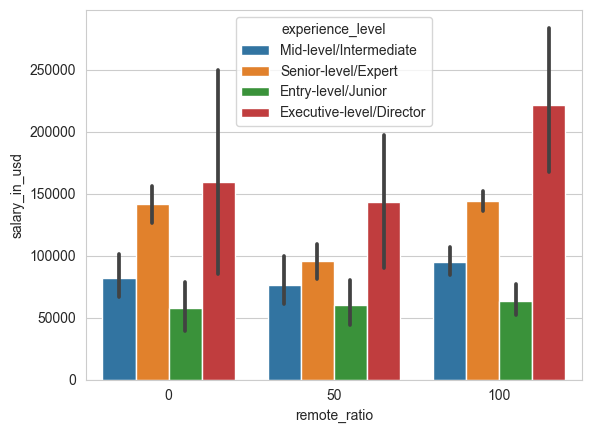

In [102]:
sns.barplot(data=df_salary, x='remote_ratio', y='salary_in_usd', hue='experience_level')

Para finalizar, grafique el boxplot y un barplot, de los salarios en contra de la forma de trabajar, en este caso 0 significando presencial, y 100 remoto.
Me sorprendió al haber agregado el nivel de experiencia, que aun que no sea intuitivo, según el dataset, hay senior, cobrando mas que experts en remoto.
Ademas de que se ve que los salarios en remoto, son un poco mejor pagados que los presenciales, en este caso tomando los salarios en formato de dólares.

### Titulo mejor pagado.

C:\Users\leand\AppData\Local\Temp\ipykernel_13700\3085694083.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<function matplotlib.pyplot.show(close=None, block=None)>

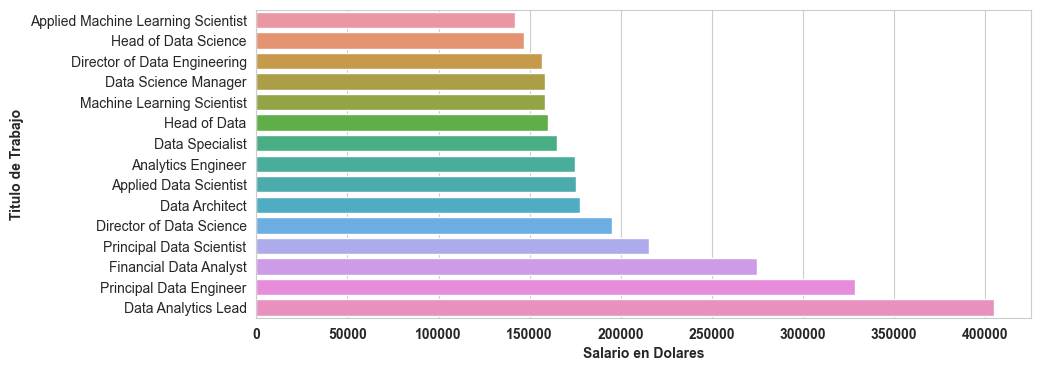

In [111]:
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")
sorted_jobs = df_salary.groupby('job_title')['salary_in_usd'].mean().sort_values().iloc[35:].index
sns.barplot(data=df_salary, y='job_title', x='salary_in_usd', order=sorted_jobs, orient= 'h', ci=None)
plt.xticks(weight = 'bold')
plt.xlabel('Salario en Dolares', fontweight='bold' )
plt.ylabel('Titulo de Trabajo', fontweight='bold')
plt.show

Siguiendo la pregunta del contratista, podemos organizar de esta manera los datos para obtener la respuesta a la pregunta. En este caso ordenamos los títulos de trabajo, por nivel de salario, resultando en un orden de menor a mayor con los salarios. El titulo mejor pagado seria "Data Analytics lead" Siguiendo por "Principal Data Engineer" y "Financial data Analyst".
Cabe mencionar que hay varios outliners que cobran bastante mas que la media del "Data Analitics Lead"

### Numero de trabajadores.


<function matplotlib.pyplot.show(close=None, block=None)>

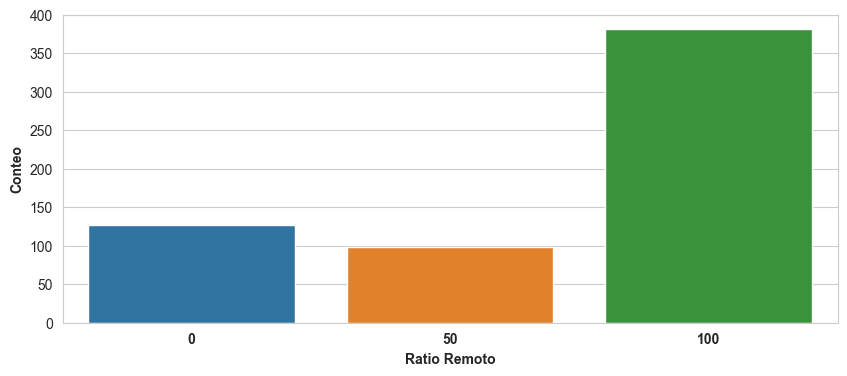

In [37]:
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")
sns.countplot(data=df_salary,x='remote_ratio')
plt.xticks(weight = 'bold')
plt.xlabel('Ratio Remoto', fontweight='bold' )
plt.ylabel('Conteo', fontweight='bold')
plt.show

En esta ocacion, respondiendo la pregunta, nos damos cuenta que hay mas personas trabajando  en remoto que precencial, y por detras de ambos, esta la gente trabajando en hibrido. <br>
**Actualizacion**: Con la completa razon, un countplot es muchisimo mas natural, y acabo de ver un sesgo de informacion importante, si bien la primicia es correcta, la cantidad de datos que deje pasar es muy importante. De esta forma, queda muchisimo mejor aclarado la cantidad de gente trabajando en remoto. (No conocia el countplot, gracias.)

### Tamaño de la compañia

<function matplotlib.pyplot.show(close=None, block=None)>

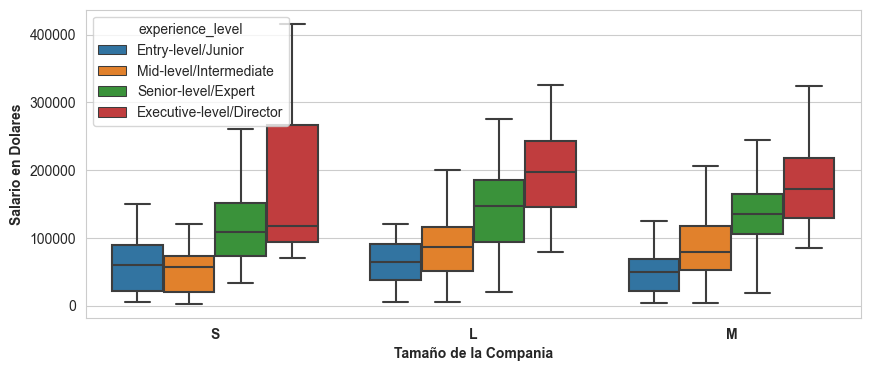

In [39]:
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")
boxplotcompany = df_salary.groupby('company_size')['salary_in_usd'].median().sort_values()
sns.boxplot(data=df_salary,x='company_size', y='salary_in_usd',hue='experience_level',showfliers=False, order=boxplotcompany.index,hue_order=['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director'] )
plt.xticks(weight = 'bold')
plt.xlabel('Tamaño de la Compania', fontweight='bold' )
plt.ylabel('Salario en Dolares', fontweight='bold')
plt.show

**Actualizacion**: La informacion aqui es un poco compleja, luego de agregar las correciones del tutor, puedo darme cuenta que no hay tanta diferencia entre las empresas grandes, y medianas. 
De aqui las concluciones claras son, las compañias pequeñas pagan menos, a diferencia de las grandes y medianas. <br>
Las compañias grandes (L), pagan mas que las otras, con diferencia, a excepcion de casos concretos, que se ven reflejados en el alcance de boxplot en las compañias medianas <br>
La media en las compañias M, es un poco mejor que las compañias L <br> sin embargo, eso solo ocurre en el nivel 'SE'.

In [40]:
salario_ordenado = df_salary.sort_values('company_size', ascending=False)
px.box(y = salario_ordenado['salary_in_usd'], x = salario_ordenado['company_size'], color = salario_ordenado['experience_level'], color_discrete_sequence=px.colors.qualitative.Dark2,
       width=1200, height=600)

Acompañando al aprendisaje de mis habilidades de EDA, en este caso estoy probando nuevas funciones de plotly, en este caso acabo de realizar el mismo grafico, pero utilizando otro metodo, ahorrandome no solo codigo, si no siendo mas intuitivo para el publico objetivo, y aportando mas informacion utilizando tooltips, para el proyecto final, intentare cambiar todos los graficos a este tipo.

### Tipo de contratacion

<function matplotlib.pyplot.show(close=None, block=None)>

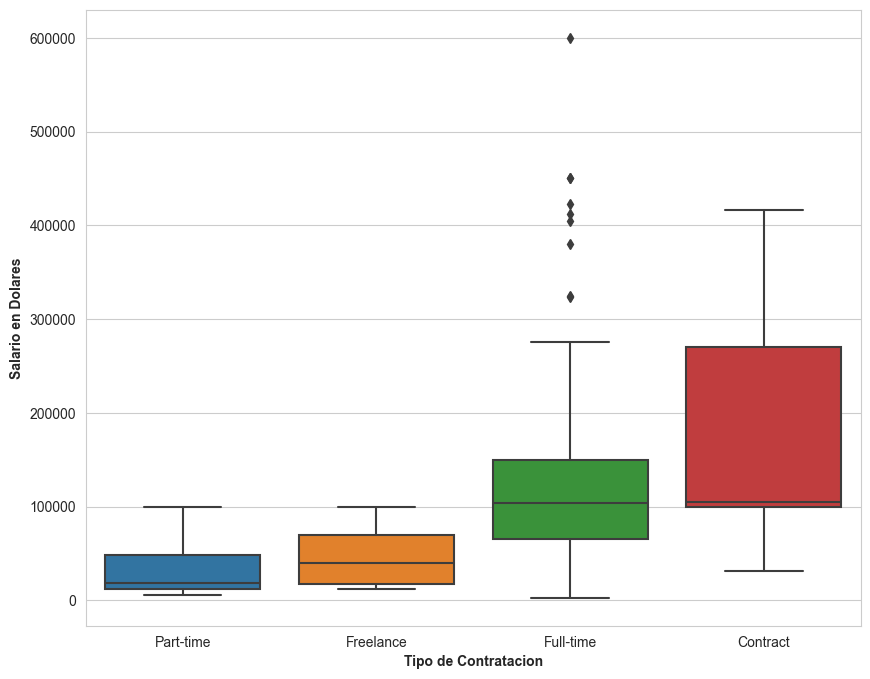

In [41]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.boxplot(data=df_salary, x='employment_type', y='salary_in_usd', order=['Part-time','Freelance','Full-time','Contract'])
plt.xlabel('Tipo de Contratacion', fontweight='bold')
plt.ylabel('Salario en Dolares', fontweight='bold')
plt.show

Text(0, 0.5, 'Salario en Dolares')

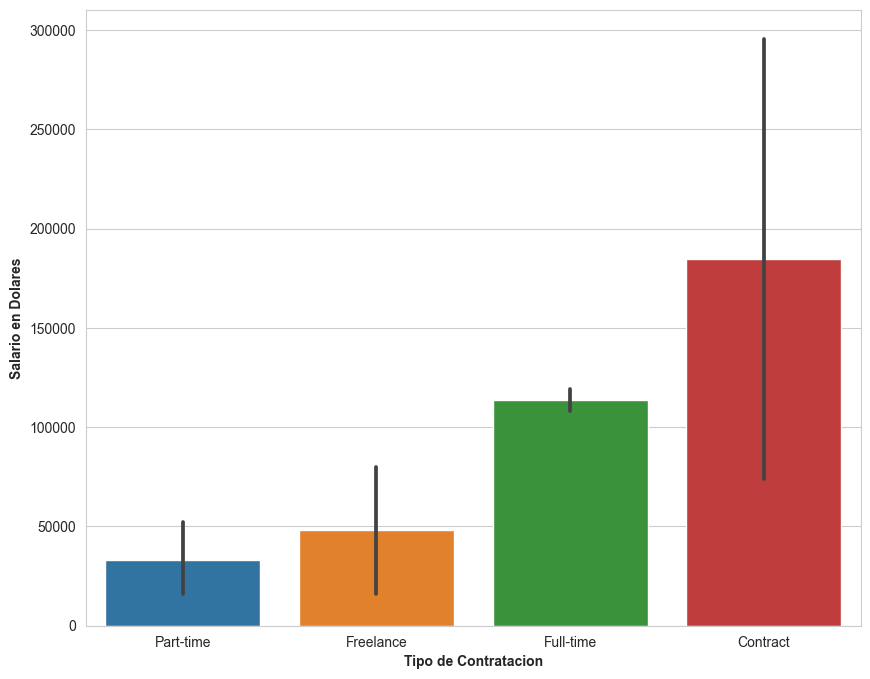

In [42]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.barplot(data=df_salary, x='employment_type', y='salary_in_usd', order=['Part-time','Freelance','Full-time','Contract'])
plt.xlabel('Tipo de Contratacion', fontweight='bold')
plt.ylabel('Salario en Dolares', fontweight='bold')

Como habremos visto en anteriores graficos, y disculpandome por la redundancia en pos de la exploracion certera, podemos ver que los que estan bajo contrato, y en posiciones full time, cobran mas que aquellos que realizan freelance o medio tiempo.

### Salario por Recidencia

<function matplotlib.pyplot.show(close=None, block=None)>

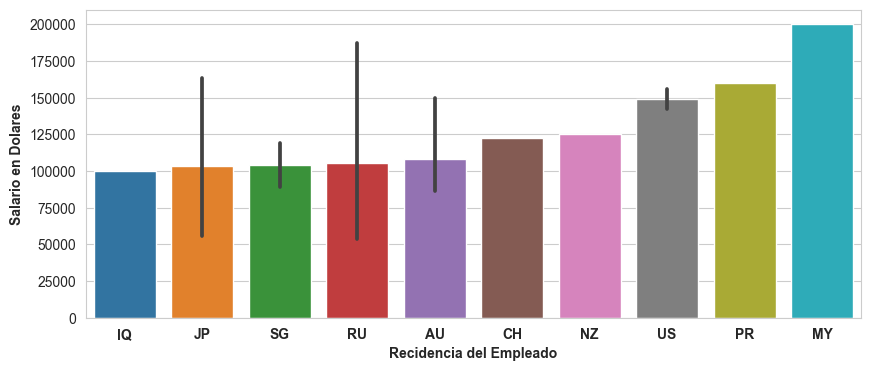

In [43]:
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")
sorted_residence = df_salary.groupby('employee_residence')['salary_in_usd'].mean().sort_values().iloc[47:].index
sns.barplot(data=df_salary, y='salary_in_usd', x='employee_residence', order=sorted_residence)
plt.xticks(weight = 'bold')
plt.xlabel('Recidencia del Empleado', fontweight='bold')
plt.ylabel('Salario en Dolares', fontweight='bold')
plt.show

Mediante la exploracion de datos, nos damos cuenta de que efectivamente. En algunos paises, o lugares de residencia, los salarios son mejores pagos que en otros lugares. En este caso, siguiendo las recomendaciones del tutor, realice un iloc, al siguiente del sort_values para ordenar mis variables y despues solo quedarme con las principales 10.

## Conclusion 

Gracias a este análisis exploratorio, nos podemos dar cuenta de varias cosas.
<ol>
<li>La variable objetiva a querer predecir será Salario en Dólares, por su importancia y objetividad, además de su correlación que veremos próximamente

<li>Podemos sacar varias conclusiones, pero nos damos cuenta de que las variables más importantes las vemos en los niveles de experiencia, la localización del empleado y donde está ubicada la compañía

<li>Nuestros datos no son lineales, vemos mucha variedad en los datos

<li>Tenemos poca información en algunas columnas, que puede representar un problema el momento de realizar MachineLearning, como pueden ser la cantidad vista en el análisis uni variado, en donde en algunas columnas predominaban por una amplia mayoría datos de un tipo

<ol>


# 🧐Feature Selection

### Método de filtro

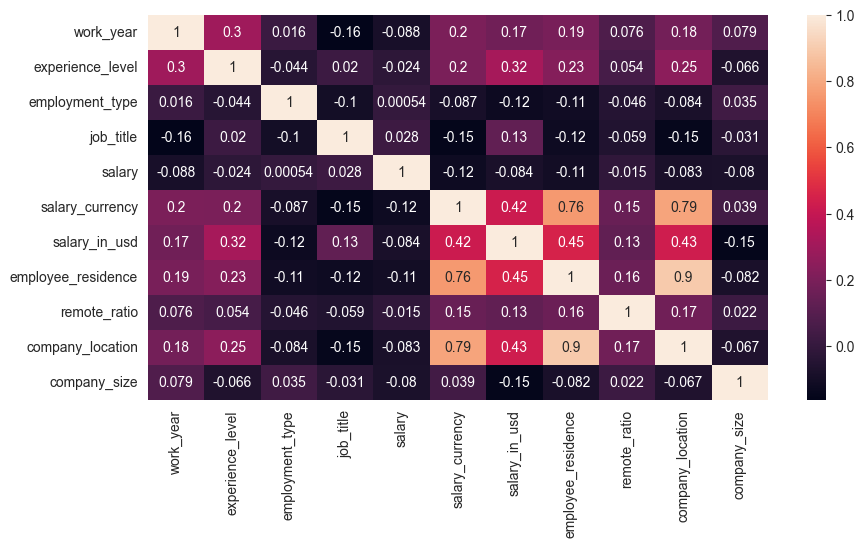

In [44]:
corrsalaryML=df_salaryML_LabelEncoder.corr()
plt.figure(figsize=(10,5))
heatmap=sns.heatmap(corrsalaryML, annot=True)
sns.color_palette("flare", as_cmap=True)
plt.show()

Al aplicar el método de filtro, puedo ver las variables que tienen más correlación con mi variable objetivo, en este caso sería "Salario en dólares" Que será el valor a predecir, viendo la correlaciones de las variables me doy cuenta de que puedo realizar 2 predicciones. <br>
Por un lado, puedo predecir el aumento del salario con base en los años, y por el otro puedo  ver por la residencia, y la localización de la compañía con su nivel de experiencia, calcular el salario aproximado que tendría por ejemplo un residente de argentina, junior que trabajara para una empresa en los estados unidos, intentaré basar mi trabajo en estas dos primicias. <br>
**Para este trabajo en particular, voy a elegir esas variables**



## Luego del metodo de filtro, intentare realizar un foward selection o un step wise, para comprobar mis resultados anteriores.

In [45]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.ensemble import  AdaBoostRegressor
import xgboost as xgb


#### Tanda #1 k features 5

In [46]:
salarySFS = df_salaryML_LabelEncoder.copy()

X = salarySFS.drop(['salary_in_usd'],1)
y = salarySFS['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()


sfs = SequentialFeatureSelector(lr, k_features=5, forward=True, verbose=2, scoring='r2', cv=5)

# Ejecutar el forward selection
sfs.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

df1= salarySFS[list(sfs.k_feature_names_)]
df1

C:\Users\leand\AppData\Local\Temp\ipykernel_13700\3238975332.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished

[2023-04-18 14:16:11] Features: 1/5 -- score: 0.20390349731851964[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Index(['experience_level', 'job_title', 'salary_currency',
       'employee_residence', 'company_size'],
      dtype='object')


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s finished

[2023-04-18 14:16:11] Features: 2/5 -- score: 0.24788980040804542[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-04-18 14:16:11] Features: 3/5 -- score: 0.2756393693691498[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-04-18 14:16:11] Features: 4/5 -- score: 0.2882708395190277[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 

,experience_level,job_title,salary_currency,employee_residence,company_size
0,2,22,7,14,0
1,3,41,16,32,2
2,3,7,8,20,1
3,2,47,16,23,2
4,3,38,16,55,0
...,...,...,...,...,...
602,3,17,16,55,1
603,3,17,16,55,1
604,3,12,16,55,1
605,3,12,16,55,1


En este caso con K feature 3, podemos comprobar nuestra teoria con el metodo de filtro, de todas formas, variaremos un poco para tener varios ejemplos.

#### Tanda #2 k features 7

In [47]:
X = salarySFS.drop(['salary_in_usd'],1)
y = salarySFS['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()


sfs = SequentialFeatureSelector(lr, k_features=7, forward=True, verbose=2, scoring='r2', cv=5)

# Ejecutar el forward selection
sfs.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

df2= salarySFS[list(sfs.k_feature_names_)]
df1

C:\Users\leand\AppData\Local\Temp\ipykernel_13700\3105924818.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2023-04-18 14:16:11] Features: 1/7 -- score: 0.20390349731851964[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2023-04-18 14:16:11] Features: 2/7 -- score: 0.24788980040804542[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | 

Index(['work_year', 'experience_level', 'job_title', 'salary',
       'salary_currency', 'employee_residence', 'company_size'],
      dtype='object')


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2023-04-18 14:16:11] Features: 6/7 -- score: 0.302709757967918[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-04-18 14:16:12] Features: 7/7 -- score: 0.30474586669407755

,experience_level,job_title,salary_currency,employee_residence,company_size
0,2,22,7,14,0
1,3,41,16,32,2
2,3,7,8,20,1
3,2,47,16,23,2
4,3,38,16,55,0
...,...,...,...,...,...
602,3,17,16,55,1
603,3,17,16,55,1
604,3,12,16,55,1
605,3,12,16,55,1


#### Tanta #3 k features 10

In [48]:
X = salarySFS.drop(['salary_in_usd'],1)
y = salarySFS['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()


sfs = SequentialFeatureSelector(lr, k_features=10, forward=True, verbose=2, scoring='r2', cv=5)

# Ejecutar el forward selection
sfs.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

df3= salarySFS[list(sfs.k_feature_names_)]
df1

C:\Users\leand\AppData\Local\Temp\ipykernel_13700\1912048220.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2023-04-18 14:16:12] Features: 1/10 -- score: 0.20390349731851964[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2023-04-18 14:16:12] Features: 2/10 -- score: 0.24788980040804542[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-04-18 14:16:12] Features: 7/10 -- score: 0.30474586669407755[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-04-18 14:16:12] Features: 8/10 -- score: 0.30273234253493764[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-04-18 14:16:12] Features: 9/10 -- score: 0.3003244651354905[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 

,experience_level,job_title,salary_currency,employee_residence,company_size
0,2,22,7,14,0
1,3,41,16,32,2
2,3,7,8,20,1
3,2,47,16,23,2
4,3,38,16,55,0
...,...,...,...,...,...
602,3,17,16,55,1
603,3,17,16,55,1
604,3,12,16,55,1
605,3,12,16,55,1


**Voy a detenerme aqui, por que no creo que un k feature mas alto me de varianza en mis datos, dado que estamos comprobando que estan todas las columnas.

# 💻Machine Learning

### Normalizacion

In [49]:
scaler = MinMaxScaler()
df_salaryML_Normalizado = df_salaryML_LabelEncoder.copy()
df_salaryML_Normalizado['salary_in_usd'] = scaler.fit_transform(df_salaryML_LabelEncoder[['salary_in_usd']])

## Random forest

### Random forest

In [50]:
X = df_salaryML_LabelEncoder[['experience_level', 'employee_residence', 'company_location']]
y = df_salaryML_LabelEncoder['salary_in_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)



MSE: 2061695880.380151
RMSE: 45405.901382751465
R²: 0.46205905610801956


Actualizacion 1: Random forest creado.<br>
Actualizacion 2: Introducir nuevo parametro, max_depth. Al ponerlo en 5, aumenta un 1% mi r2<br>
Actualizacion 3: Procedere a realizar la misma prueba con los datos normalizados.

### Random forest mejorado, con grafico.

**Procedo a mejorar la prueba del random forest inicial, pero con mas medidas.**

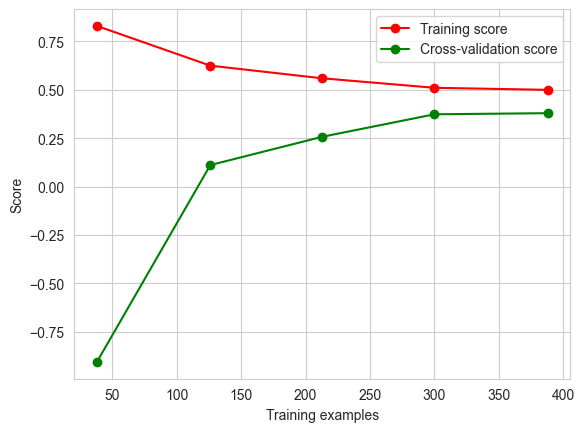

Métricas en los datos de entrenamiento:
R²: 0.4901303084599583
MSE: 2707325525.0592613
RMSE: 52031.96637701925
Métricas en los datos de prueba:
R²: 0.4524894839122161
MSE: 2098371927.8108332
RMSE: 45807.98978137802


In [51]:
X = df_salaryML_LabelEncoder[['experience_level', 'employee_residence', 'company_location', 'remote_ratio']]
y = df_salaryML_LabelEncoder['salary_in_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


train_sizes, train_scores, val_scores = learning_curve(rf_model, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))




RandomForestR2_train = r2_score(y_train, y_train_pred)
RandomForestMSE_train = mean_squared_error(y_train, y_train_pred)
RandomForestRMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


RandomForestR2_test = r2_score(y_test, y_test_pred)
RandomForestMSE_test = mean_squared_error(y_test, y_test_pred)
RandomForestRMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

Actualizacion 1: Utilizando un test_size=0.2 pude notar un poco de sobreajuste sobre el modelo, al ver los valores del MSE. <br>
Actualizacion 2: Limite aun mas la particion del test_size a 0.1, pude notar una mejora en los datos de prueba, bajando el MSE y RMSE. <br>
Actualizacion 3: Al limitar los datos al 5%, puedo ver una gran mejora del r2, ademas de bajar los valores del MSE y RMSE, por lo que puedo estar teniendo un caso de sobreajuste, sin embargo no deja de representar una mejora, podria mejorar este modelo realizando una validacion cruzada, pero que por ahora no vimos en clase, me gustaria ademas, poder explorar los parametros.
Actualizacion 4: Para evitar la sobreadaptabilidad con el caso del 5% que tuve en mis datos (son pocos) buscare lograr la mejora a partir del 20% de los datos.

## AdaBoost

### Adaboost Inicial

In [52]:
X = df_salaryML_LabelEncoder[['experience_level', 'employee_residence', 'company_location']]
y = df_salaryML_LabelEncoder['salary_in_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaBoost = AdaBoostRegressor(n_estimators=100, random_state=42)
adaBoost.fit(X_train, y_train)

y_pred = adaBoost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)



MSE: 2443348429.690936
RMSE: 49430.238009652916
R²: 0.3624776704299493


### Adaboost con grafico

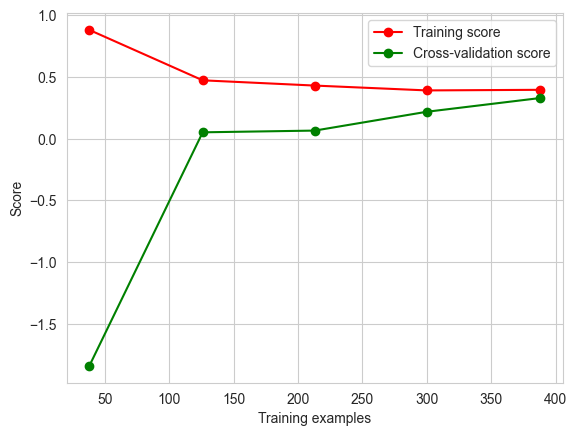

Métricas en los datos de entrenamiento:
R²: 0.4168696243654786
MSE: 3096327898.260163
RMSE: 55644.65740985529
Métricas en los datos de prueba:
R²: 0.35992445587122257
MSE: 2453133801.1099043
RMSE: 49529.12073830813


In [53]:
X = df_salaryML_LabelEncoder[['experience_level', 'employee_residence', 'company_location', 'remote_ratio']]
y = df_salaryML_LabelEncoder['salary_in_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaBoost = AdaBoostRegressor(n_estimators=100, random_state=42)
adaBoost.fit(X_train, y_train)

y_train_pred = adaBoost.predict(X_train)
y_test_pred = adaBoost.predict(X_test)


train_sizes, train_scores, val_scores = learning_curve(adaBoost, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))



AdaboostR2_train = r2_score(y_train, y_train_pred)
AdaboostMSE_train = mean_squared_error(y_train, y_train_pred)
AdaboostRMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


AdaboostR2_test = r2_score(y_test, y_test_pred)
AdaboostMSE_test = mean_squared_error(y_test, y_test_pred)
AdaboostRMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

## XGBoost

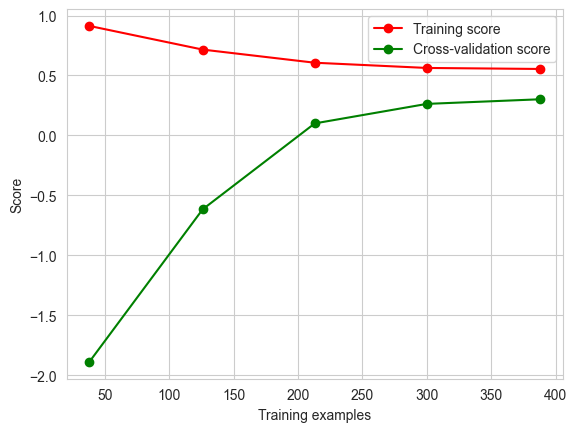

Métricas en los datos de entrenamiento:
R²: 0.5421021781133805
MSE: 2431363310.3357906
RMSE: 49308.85630731857
Métricas en los datos de prueba:
R²: 0.44059221254541414
MSE: 2143969043.336633
RMSE: 46303.01332890369


In [54]:
X = df_salaryML_LabelEncoder[['experience_level', 'employee_residence', 'company_location', 'remote_ratio']]
y = df_salaryML_LabelEncoder['salary_in_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XGBoost = xgb.XGBRegressor(n_estimators=100, random_state=42)
XGBoost.fit(X_train, y_train)

y_train_pred = XGBoost.predict(X_train)
y_test_pred = XGBoost.predict(X_test)


train_sizes, train_scores, val_scores = learning_curve(XGBoost, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))




XGBoostR2_train = r2_score(y_train, y_train_pred)
XGBoostMSE_train = mean_squared_error(y_train, y_train_pred)
XGBoostRMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

XGBoostR2_test = r2_score(y_test, y_test_pred)
XGBoostMSE_test = mean_squared_error(y_test, y_test_pred)
XGBoostRMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Conclusion

Analisando brevemente los datos, por orden <br>
<br>
El random forest presenta leves signos de Overfitting. El r2 y el MSE en entrenamiento son mejores que en la practica/prueba. Ademas, al momento de realizar la Cross Validation, podemos ver que a pesar de que en entrenamiento baja, y la CVScore aumenta, sigue siendo mas alto. Por lo tanto concluyo que tiene sobreajuste. <br>
<br>
Con el Adaboost podemos concluir simplemente con lo mediocre que dan las puntuaciones, que no es el mejor modelo para nuestros datos. Si bien queda probar con el OneHotEncoder, los resultados no son esperanzadores. <br>
<br>
Y finalmente con el GXBoost, tenemos un problema parecido al random forest, con diferencia de que el MSE nos indica que esta ligeramente sobreajustado, lo que sugiere que por un lado, el modelo no se termina de adaptar a los datos. Tengo en mente, que el problema pueda ser por el tipo de encoder, viendo los resultados. Intentare mejorar para el proximo entregable el tipo de codificacion.<br>
<br>
Otra de las conclusiones que sacamos de estos modelos, gracias al MSE o error cuadratico, es que nuestros modelos fallan... Y por mucho.<br>
En este caso, tendremos que trabajar formas de mejorar no solo el r2, si no que tambien el error. Los modelos presentados no solo no tienen un buen indice de acierto, si no que llegan a un numero muy alto de error dando resultados muy dispersos, por el otro lado, se ve que la seed de aleatoriedad de los datos esta bien ejemplificada.

# ✅ Valoracion de Algoritmos

## Grafico R2

En este caso, realice un grafico que comprara distintos modelos de regresion para mis datos. Puedo notar que mi random forest, con un tamaño del 5% de los datos de testeo, es el que tiene una mejora con respecto a sus competidores. El XGBoost con un tamaño del 10% y uno con el 20% no marca tanto la diferencia, pero si se ponen por encima, o en valores iguales que el random forest al 20%. <br>
Puedo concluir que actualmente, dada la cantidad de conocimiento que tengo (aun que queda por debatir o mejorar si el random forest presenta casos de adaptamiento, o overfitting) y el conocimiento actual de los modelos que conozco, me convendria realizarlo tanto por random forest, como por XGBoost.

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una lista con los nombres de los modelos
model_names = ['Random Forest Train', 'Random Forest Test', 'AdaBoost Train', 'AdaBoost Test', 'XGBoost Train','XGBoost Test']

# Crear una lista con los errores de cada modelo
r2 = [RandomForestR2_train, RandomForestR2_test, AdaboostR2_train, AdaboostR2_test, XGBoostR2_train, XGBoostR2_test] # Reemplazar rf_error, ab_error, xgb_error con los valores de error obtenidos para cada modelo

# Crear un gráfico de barras

fig = px.bar(x=model_names, y=r2, width=1200, height=600, color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_xaxes(title_text="Modelos")
fig.update_yaxes(title_text="Coeficiente de determinación (R^2)")


## Grafico MSE

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una lista con los nombres de los modelos
model_names = ['Random Forest Train', 'Random Forest Test', 'AdaBoost Train', 'AdaBoost Test', 'XGBoost Train','XGBoost Test']


# Crear una lista con los errores de cada modelo
errors = [RandomForestMSE_train, RandomForestMSE_test, AdaboostMSE_train, AdaboostMSE_test, XGBoostMSE_train, XGBoostMSE_test] # Reemplazar rf_error, ab_error, xgb_error con los valores de error obtenidos para cada modelo


fig = px.bar(x=model_names, y=errors, width=1200, height=600, color_discrete_sequence=px.colors.sequential.Viridis )
fig.update_xaxes(title_text="Modelos")
fig.update_yaxes(title_text="Coeficiente de Error MSE")

## Grafico RMSE

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una lista con los nombres de los modelos
model_names = ['Random Forest Train', 'Random Forest Test', 'AdaBoost Train', 'AdaBoost Test', 'XGBoost Train','XGBoost Test']


# Crear una lista con los errores de cada modelo
errorsR = [RandomForestRMSE_train, RandomForestRMSE_test, AdaboostRMSE_train, AdaboostRMSE_test, XGBoostRMSE_train, XGBoostRMSE_test] # Reemplazar rf_error, ab_error, xgb_error con los valores de error obtenidos para cada modelo


fig = px.bar(x=model_names, y=errorsR, width=1200, height=600, color_discrete_sequence=px.colors.sequential.Viridis )
fig.update_xaxes(title_text="Modelos")
fig.update_yaxes(title_text="Coeficiente de Error RMSE")